In [1]:
%matplotlib inline

# internal
import json

# external
import folium
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='whitegrid')

In [2]:
system_info_url = 'http://gbfs.urbansharing.com/bergen-city-bike/system_information.json'
station_info_url = 'http://gbfs.urbansharing.com/bergen-city-bike/station_information.json'
station_status_url = 'http://gbfs.urbansharing.com/bergen-city-bike/station_status.json'

In [3]:
system_info = requests.get(system_info_url).json()['data']

In [4]:
print(json.dumps(system_info, indent=4, ensure_ascii=False))

{
    "id": "bergen-city-bike",
    "language": "nb",
    "name": "Bergen City Bike",
    "operator": "Urban Infrastructure Partner",
    "timezone": "Europe/Oslo",
    "phone_number": "90259737",
    "email": "post@bergenbysykkel.no"
}


In [5]:
station_info = pd.DataFrame.from_dict(requests.get(station_info_url).json()["data"]["stations"])
station_info.columns = ["Address", "Capacity", "Latitude", "Longitude", "Name", "ID"]
station_info

,Address,Capacity,Latitude,Longitude,Name,ID
0,Kaigaten,19,60.391681,5.327895,Rådhuset,223
1,Måsekjæret,10,60.412929,5.320474,Sandviken Brygge,222
2,sandvikstorget 11,19,60.408582,5.322649,Sandvikstorget,221
3,Møllendalsveien 60,16,60.379686,5.351994,Møllendalsplass,220
4,Jonsvollsgaten,19,60.392677,5.317308,Jonsvollkvartalet,219
5,C Sundsgate,10,60.397238,5.314001,Nykirken,217
6,Sydnesplassen,25,60.388530,5.318665,Johanneskirken,216
7,Kaigaten 5 ved Vincent Lounge,37,60.389672,5.333605,Nonneseterplass,215
8,Nygårdsgaten,19,60.384181,5.333161,Media City,214
9,Klosteret 4,22,60.394931,5.315319,Klosteret,212


In [6]:
capacity = sum(station[1]['Capacity'] for station in station_info.iterrows())
print(f"Capacity (total): {capacity} bikes")

Capacity (total): 654 bikes


In [7]:
bergensere = 254_235 # https://www.ssb.no/befolkning/statistikker/beftett
print(f"Bikes per citizen in Bergen: {capacity/bergensere:.4f}")

Bikes per citizen in Bergen: 0.0026


In [8]:
def clean_dataframe(dataframe):
    dataframe.Installed = dataframe.Installed.map({1: True, 0: False})
    dataframe.Renting = dataframe.Renting.map({1: True, 0: False})
    dataframe.Returning = dataframe.Returning.map({1: True, 0: False})
    dataframe.Updated = pd.to_datetime(dataframe.Updated, unit='s', utc=True)
    dataframe.Updated = dataframe.Updated.dt.tz_convert(system_info['timezone'])
    dataframe.Updated = dataframe.Updated.dt.strftime("%Y-%m-%d %H:%M:%S")

In [9]:
station_status = pd.DataFrame.from_dict(requests.get(station_status_url).json()['data']['stations'])
station_status.columns = ["Installed", "Renting", "Returning", "Updated", "Bikes", "Docks", "ID"]
clean_dataframe(station_status)
station_status

,Installed,Renting,Returning,Updated,Bikes,Docks,ID
0,True,True,True,2018-07-31 02:23:38,0,19,223
1,True,True,True,2018-07-31 02:23:38,1,9,222
2,True,True,True,2018-07-31 02:23:38,4,11,221
3,True,True,True,2018-07-31 02:23:38,5,0,220
4,True,True,True,2018-07-31 02:23:38,1,16,219
5,True,True,True,2018-07-31 02:23:38,1,4,217
6,True,True,True,2018-07-31 02:23:38,1,22,216
7,True,True,True,2018-07-31 02:23:38,2,29,215
8,True,True,True,2018-07-31 02:23:38,0,19,214
9,True,True,True,2018-07-31 02:23:38,0,20,212


In [10]:
stations = station_status.merge(station_info)
stations.drop('Address', axis=1, inplace=True)
stations.set_index('ID', inplace=True)
stations

,Installed,Renting,Returning,Updated,Bikes,Docks,Capacity,Latitude,Longitude,Name
ID,,,,,,,,,,
223,True,True,True,2018-07-31 02:23:38,0,19,19,60.391681,5.327895,Rådhuset
222,True,True,True,2018-07-31 02:23:38,1,9,10,60.412929,5.320474,Sandviken Brygge
221,True,True,True,2018-07-31 02:23:38,4,11,19,60.408582,5.322649,Sandvikstorget
220,True,True,True,2018-07-31 02:23:38,5,0,16,60.379686,5.351994,Møllendalsplass
219,True,True,True,2018-07-31 02:23:38,1,16,19,60.392677,5.317308,Jonsvollkvartalet
217,True,True,True,2018-07-31 02:23:38,1,4,10,60.397238,5.314001,Nykirken
216,True,True,True,2018-07-31 02:23:38,1,22,25,60.388530,5.318665,Johanneskirken
215,True,True,True,2018-07-31 02:23:38,2,29,37,60.389672,5.333605,Nonneseterplass
214,True,True,True,2018-07-31 02:23:38,0,19,19,60.384181,5.333161,Media City


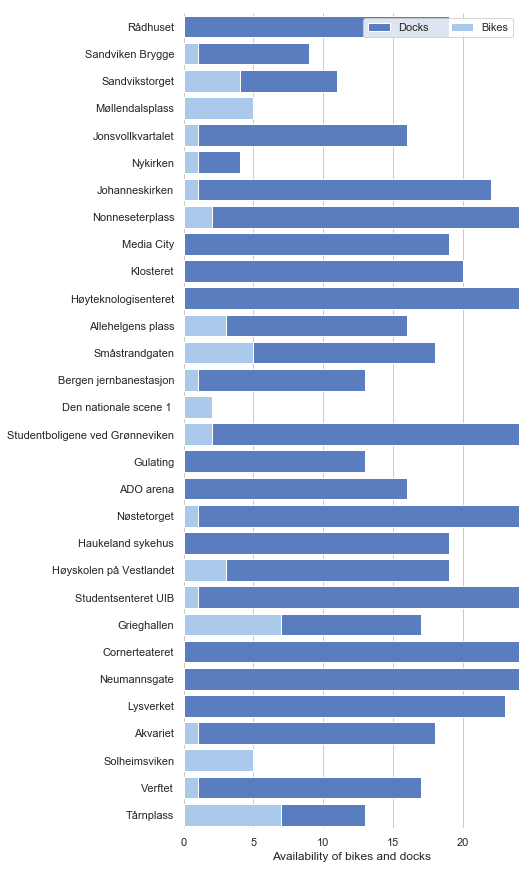

In [11]:
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("muted")
sns.barplot(x="Docks", y="Name", data=stations, label="Docks", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="Bikes", y="Name", data=stations, label="Bikes", color="b")

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Availability of bikes and docks")
sns.despine(left=True, bottom=True)

In [12]:
map = folium.Map(location=[60.391263, 5.322054], zoom_start=14)

In [13]:
map

In [14]:
def add_marker(input):
    for station in input.iterrows():
        station_name = station[1]['Name']
        lat, lon = (station[1]['Latitude'], station[1]['Longitude'])
        bikes, docks, capacity = (station[1]['Bikes'], station[1]['Docks'], station[1]['Capacity'])
        folium.Marker(
            location=[lat, lon],
            popup=f"""
            <h4 style="text-align: center;">{station_name}</h4><br>
            <table style="border-collapse: collapse;">
                <tr>
                    <th style="border-top: 1px solid black; padding: 10px; text-align: left;">Capacity</th>
                    <th style="border-top: 1px solid black; padding: 10px; text-align: left;">Bikes</th>
                    <th style="border-top: 1px solid black; padding: 10px; text-align: left;">Docks</th>
                </tr>
                <tr>
                    <td style="border-top: 1px solid black; padding: 10px; text-align: left;">{capacity}</td>
                    <td style="border-top: 1px solid black; padding: 10px; text-align: left;">{bikes}</td>
                    <td style="border-top: 1px solid black; padding: 10px; text-align: left;">{docks}</td>
                </tr>
            </table>
            """
        ).add_to(map)
        
add_marker(stations)

In [15]:
map